<a href="https://colab.research.google.com/github/hyerimson/Semi-Project/blob/main/%ED%98%9C%EB%A6%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 성별/연령대별 소비 패턴

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime

In [ ]:
#성별연령대별 카드 소비 패턴 파일 불러오기
files = 'Consumption patterns by gender and age group.csv'

In [ ]:
df = pd.read_csv(files, encoding='cp949')
df = df[df['기준년월(YM)'] >= 201901]

In [ ]:
df

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
2,SS016,202009,32925,M,50대,100600,25
5,SS048,201911,220797,M,40대,20120,15
6,SS058,202006,152728,F,40대,285201,91
10,SS048,202104,199466,M,20대,377753,45
...,...,...,...,...,...,...,...
491,SS044,201908,17038,F,30대,804347,5
492,SS069,201907,24110,F,20대,15090,5
493,SS007,201905,227869,F,30대,342040,5
497,SS054,201901,418149,F,20대,1056300,15


In [ ]:
#필요한 코드만 가져와서 데이터 프레임 만들기
ref_upjong_cd = {'코드':['ss001','ss002','ss003','ss004','ss005','ss006','ss007','ss008'],
                 '대분류(CLS1)':'요식/유흥',
                 '중분류(CLS2)':['한식','일식/중식/양식','일식/중식/양식','일식/중식/양식','제과/커피/패스트푸드','제과/커피/패스트푸드','제과/커피/패스트푸드','기타요식'],
                 '소분류(CLS3)':['한식','일식','양식','중식','제과점','커피전문점','패스트푸드','기타요식']}
df1 = pd.DataFrame(ref_upjong_cd)

In [ ]:
#업종 코드 중 필요한 코드는 SS001~ss008
df1

,코드,대분류(CLS1),중분류(CLS2),소분류(CLS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점
5,ss006,요식/유흥,제과/커피/패스트푸드,커피전문점
6,ss007,요식/유흥,제과/커피/패스트푸드,패스트푸드
7,ss008,요식/유흥,기타요식,기타요식


In [ ]:
df

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
2,SS016,202009,32925,M,50대,100600,25
5,SS048,201911,220797,M,40대,20120,15
6,SS058,202006,152728,F,40대,285201,91
10,SS048,202104,199466,M,20대,377753,45
...,...,...,...,...,...,...,...
491,SS044,201908,17038,F,30대,804347,5
492,SS069,201907,24110,F,20대,15090,5
493,SS007,201905,227869,F,30대,342040,5
497,SS054,201901,418149,F,20대,1056300,15


In [ ]:
filterd_upjong = ['SS001', 'SS002', 'SS003', 'SS004', 'SS005', 'SS006', 'SS007', 'SS008']

# 해당 업종 코드만 포함하는 데이터로 필터링
df = df[df['서울시민업종코드(UPJONG_CD)'].isin(filterd_upjong)]

In [ ]:
output = 'output.csv'
df.to_csv('output.csv', index=False)

In [ ]:
df = pd.read_csv('output.csv', encoding='UTF-8')
data1 = pd.DataFrame(df)
data1
df = data1.sort_values(by='연령대별(AGE)')
df

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
21,SS007,202103,21034,M,20대,160960,5
40,SS008,202105,157630,F,20대,875220,30
39,SS001,201911,339654,F,20대,35713,91
38,SS006,202005,11679,F,20대,51306,5
34,SS006,202012,352914,F,20대,7108134,40
22,SS001,202004,155376,F,20대,118708,15
10,SS003,202102,215812,M,20대,3082937,131
12,SS004,202011,338358,F,20대,97582,45
19,SS001,202012,228734,M,20대,464772,5
36,SS001,202106,350949,M,30대,4847663,15


In [ ]:
age = df['연령대별(AGE)']
amt_corr = df['카드이용금액계(AMT_CORR)']

In [ ]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

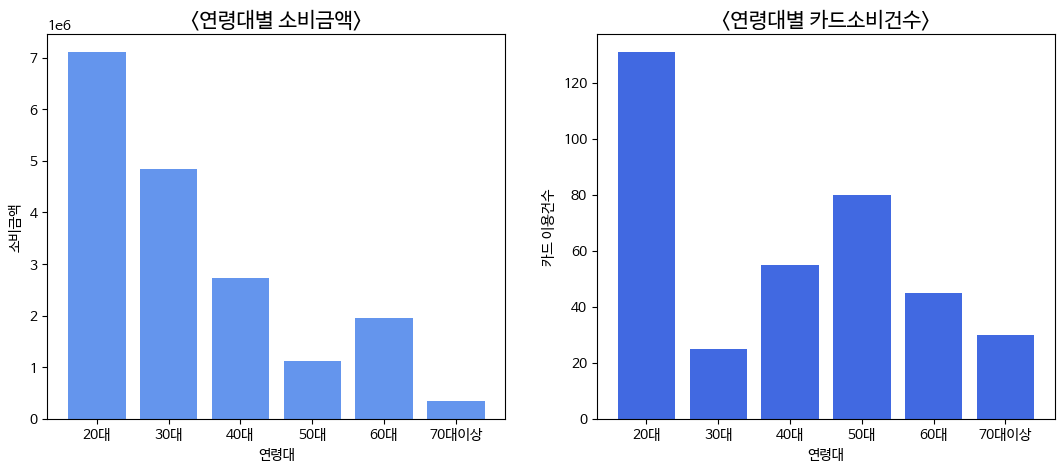

In [ ]:
#나눔폰트로 지정
plt.rc('font', family='NanumBarunGothic')

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# 연령대별 소비금액 그래프

ax1.bar(age, amt_corr, color='cornflowerblue')
ax1.set_title('<연령대별 소비금액>',fontsize=15)
ax1.set_xlabel('연령대')
ax1.set_ylabel('소비금액')

age = df['연령대별(AGE)']
usect_corr = df['카드이용건수계(USECT_CORR)']

# 연령대별 카드이용건수 그래프
ax2.bar(age, usect_corr, color='royalblue')
ax2.set_title('<연령대별 카드소비건수>',fontsize=15)
ax2.set_xlabel('연령대')
ax2.set_ylabel('카드 이용건수')

plt.xticks(rotation=0)
plt.show()

- 20대가 가장 많이 소비를 한 연령대이다.
- 소비금액이 클 뿐만 아니라 카드 소비 건수도 가장 빈번했던 연령대가 20대이다.
- 코로나19라는 상황에서 20대의 소비 패턴에 어떤 변화가 있었는지 살펴볼 필요가 있다.

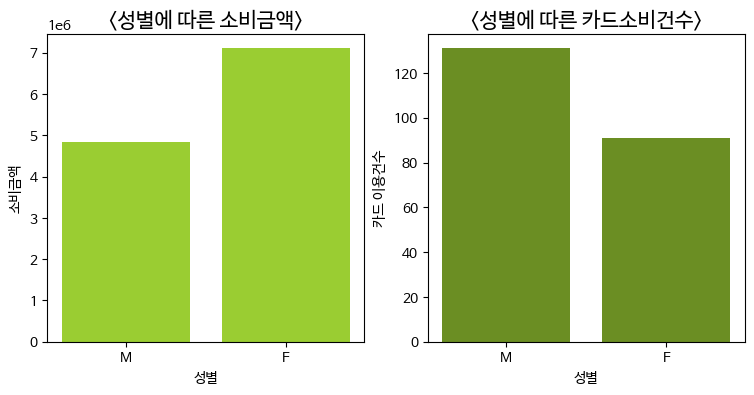

In [ ]:
# 그래프 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

gender = df['성별(GEDNER)']
amt_corr = df['카드이용금액계(AMT_CORR)']
usect_corr = df['카드이용건수계(USECT_CORR)']

# 성별에 따른 소비금액 그래프
ax1.bar(gender, amt_corr, color='yellowgreen')
ax1.set_title('<성별에 따른 소비금액>',fontsize=15)
ax1.set_xlabel('성별')
ax1.set_ylabel('소비금액')

# 성별에 따른 카드이용건수 그래프
ax2.bar(gender, usect_corr, color='olivedrab')
ax2.set_title('<성별에 따른 카드소비건수>',fontsize=15)
ax2.set_xlabel('성별')
ax2.set_ylabel('카드 이용건수')

plt.xticks(rotation=0)
plt.show()

- 남성보다 여성이 더 소비금액은 크지만, 카드 소비건수에서는 여성보다 남성이 더 높은 것으로 나왔다.
- 남성은 빈번하게 소비하더라도 여성보다는 큰 금액을 소비하지 않는 것으로 보인다.
- 여성은 한번 구매 시 고가의 상품을 구매한다고 유추할 수 있다.
- 위 결과값보다는 코로나 상황의 성별에 따른 소비 패턴이 어떻게 변화하였는지 살펴볼 때 더 유의미한 차이를 확인할 수 있을 것으로 보인다.

In [ ]:
df

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
21,SS007,202103,21034,M,20대,160960,5
40,SS008,202105,157630,F,20대,875220,30
39,SS001,201911,339654,F,20대,35713,91
38,SS006,202005,11679,F,20대,51306,5
34,SS006,202012,352914,F,20대,7108134,40
22,SS001,202004,155376,F,20대,118708,15
10,SS003,202102,215812,M,20대,3082937,131
12,SS004,202011,338358,F,20대,97582,45
19,SS001,202012,228734,M,20대,464772,5
36,SS001,202106,350949,M,30대,4847663,15


In [ ]:
import seaborn as sns

In [ ]:
data1 = pd.DataFrame(df)
data1

,서울시민업종코드(UPJONG_CD),기준년월(YM),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR)
21,SS007,202103,M,20대,160960
40,SS008,202105,F,20대,875220
39,SS001,201911,F,20대,35713
38,SS006,202005,F,20대,51306
34,SS006,202012,F,20대,7108134
22,SS001,202004,F,20대,118708
10,SS003,202102,M,20대,3082937
12,SS004,202011,F,20대,97582
19,SS001,202012,M,20대,464772
36,SS001,202106,M,30대,4847663


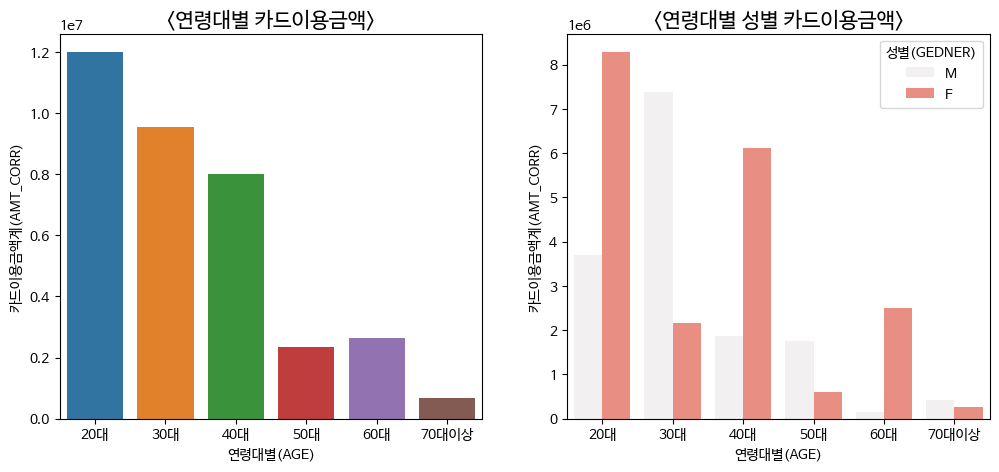

In [ ]:
data1_age=data1.sort_values(by='연령대별(AGE)')

f,ax=plt.subplots(1,2,figsize=(12,5))

sns.barplot(data=data1_age,x='연령대별(AGE)',y='카드이용금액계(AMT_CORR)',estimator=sum,errorbar=None, ax=ax[0])
ax[0].set_title('<연령대별 카드이용금액>',fontsize=15)

sns.barplot(data=data1_age,x='연령대별(AGE)',y='카드이용금액계(AMT_CORR)',hue='성별(GEDNER)',
            estimator=sum, errorbar=None,ax=ax[1],color='salmon')
ax[1].set_title('<연령대별 성별 카드이용금액>',fontsize=15)
plt.show()

- 20대 여성이 카드 이용금액이 가장 높다.
- 다음으로 30대 남성, 40대 여성 순으로 카드 이용금액이 높다.

In [ ]:
df.sort_values('기준년월(YM)')

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
14,SS001,201901,13649,M,30대,1301764,15
6,SS001,201902,361958,F,60대,1958682,5
24,SS005,201903,22916,M,50대,140488,15
30,SS004,201903,414941,F,50대,274135,80
18,SS001,201904,17531,F,60대,5533,5
11,SS005,201905,10506,F,50대,324435,10
42,SS007,201905,227869,F,30대,342040,5
17,SS003,201906,339647,M,50대,100600,10
15,SS005,201907,224469,F,40대,434089,5
4,SS004,201907,282850,F,60대,66648,30


In [ ]:
# 기준년월(YM) 컬럼을 datetime으로 변환
df['기준년월(YM)'] = pd.to_datetime(df['기준년월(YM)'], format='%Y%m')

In [ ]:
# '기준년월(YM)' 컬럼을 datetime으로 변환
df['기준년월(YM)'] = pd.to_datetime(df['기준년월(YM)'], format='%Y%m')

# 기준에 따라 데이터를 구간별로 분류
data_before_201912 = df[df['기준년월(YM)'] < pd.to_datetime('201912', format='%Y%m')]
data_after_201912 = df[(df['기준년월(YM)'] >= pd.to_datetime('201912', format='%Y%m')) & (df['기준년월(YM)'] < pd.to_datetime('202002', format='%Y%m'))]
data_after_202002 = df[(df['기준년월(YM)'] >= pd.to_datetime('202002', format='%Y%m')) & (df['기준년월(YM)'] < pd.to_datetime('202008', format='%Y%m'))]
data_after_202008 = df[(df['기준년월(YM)'] >= pd.to_datetime('202008', format='%Y%m')) & (df['기준년월(YM)'] < pd.to_datetime('202011', format='%Y%m'))]
data_after_202011 = df[(df['기준년월(YM)'] >= pd.to_datetime('202011', format='%Y%m')) & (df['기준년월(YM)'] < pd.to_datetime('202106', format='%Y%m'))]
data_after_202106 = df[df['기준년월(YM)'] >= pd.to_datetime('202106', format='%Y%m')]

list1 = ['data_before_201912','data_after_201912','data_after_202002','data_after_202008','data_after_202011','data_after_20106']

# 각 그룹별 소비금액 합산
total_amt_before_201912 = data_before_201912['카드이용금액계(AMT_CORR)'].sum()
total_amt_after_201912 = data_after_201912['카드이용금액계(AMT_CORR)'].sum()
total_amt_after_202002 = data_after_202002['카드이용금액계(AMT_CORR)'].sum()
total_amt_after_202008 = data_after_202008['카드이용금액계(AMT_CORR)'].sum()
total_amt_after_202011 = data_after_202011['카드이용금액계(AMT_CORR)'].sum()
total_amt_after_202106 = data_after_202106['카드이용금액계(AMT_CORR)'].sum()

#그룹을 리스트에 넣기
list2 = ['total_amt_before_201912','total_amt_after_201912','total_amt_after_202002','total_amt_after_202008','total_amt_after_202011','total_amt_after_202106' ]
# 결과 출력
print("2019년 12월 이전 그룹의 총 소비금액:", total_amt_before_201912)
print("2019년 12월 이후 2020년 2월 이전 그룹의 총 소비금액:", total_amt_after_201912)
print("2020년 2월 이후 2020년 8월 이전 그룹의 총 소비금액:", total_amt_after_202002)
print("2020년 8월 이후 2020년 11월 이전 그룹의 총 소비금액:", total_amt_after_202008)
print("2020년 11월 이후 2021년 6월 이전 그룹의 총 소비금액:", total_amt_after_202011)
print("2021년 6월 이후 그룹의 총 소비금액:", total_amt_after_202106)

2019년 12월 이전 그룹의 총 소비금액: 5867848
2019년 12월 이후 2020년 2월 이전 그룹의 총 소비금액: 1154385
2020년 2월 이후 2020년 8월 이전 그룹의 총 소비금액: 3454302
2020년 8월 이후 2020년 11월 이전 그룹의 총 소비금액: 2014515
2020년 11월 이후 2021년 6월 이전 그룹의 총 소비금액: 16096945
2021년 6월 이후 그룹의 총 소비금액: 6633263


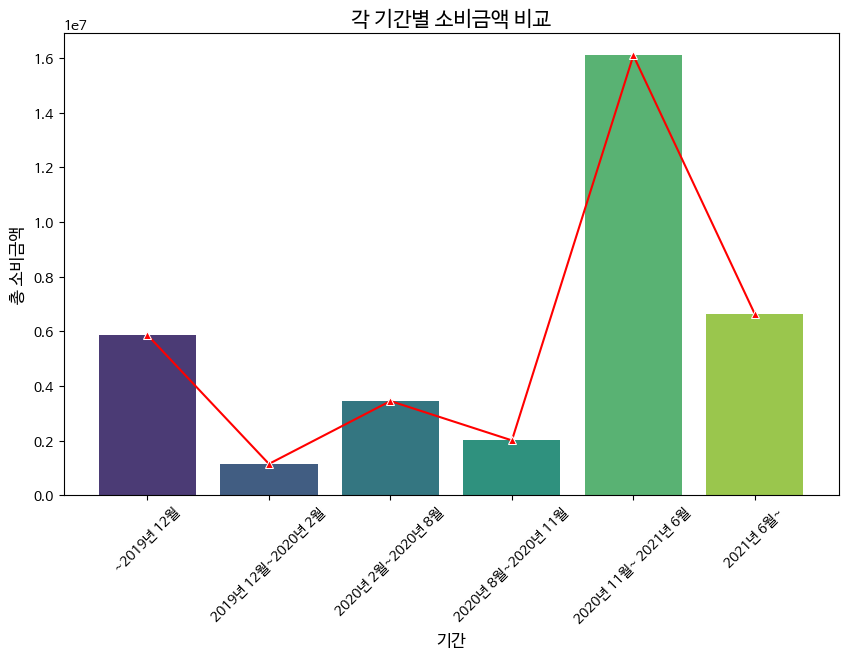

In [ ]:
group_names = ['~2019년 12월', '2019년 12월~2020년 2월', '2020년 2월~2020년 8월',
               '2020년 8월~2020년 11월', '2020년 11월~ 2021년 6월', '2021년 6월~']
group_amts = [total_amt_before_201912, total_amt_after_201912, total_amt_after_202002,
              total_amt_after_202008, total_amt_after_202011, total_amt_after_202106]

plt.figure(figsize=(10, 6))
sns.barplot(x=group_names, y=group_amts, palette='viridis')
sns.lineplot(x=group_names, y=group_amts, marker='^',color='r')
plt.title('각 기간별 소비금액 비교', fontsize=15)
plt.xlabel('기간', fontsize=12)
plt.ylabel('총 소비금액', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**코로나19 4차례 유행과 위드코로나**
- 1차 유행은 2020년 2월 18일~
- 2차 유행은 2020년 8월 12일~
- 3차 유행은 2020년 11월 13일~
- 4차 유행은 2021년 6월 27일~
- 3차 유행기간인 2020년 11월에서 2021년 6월 사이의 소비금액이 가장 높다.
- 3차 유행시기에는 서울에서 가장 많은 확진자가 발생하였다.

    - 주요 변이 바이러스의 연속된 출현과 함께 수도권을 중심으로 전국적으로 확산되었던 시기
    - 확진자 접촉을 통한 감염 및 미분류 사례가 증가
    - 요양시설 및 의료기관, 사우나, 체육‧여가시설, 직장, 가족‧지인 모임 등 일상생활과 밀접한 환경에서 발생이 증가

In [ ]:
# 기준년월을 코로나 유행시기에 맞게 구분
conditions = [df['기준년월(YM)'].astype(str) < '201912',
(df['기준년월(YM)'].astype(str) > '201912') & (df['기준년월(YM)'].astype(str) <= '202002'),
(df['기준년월(YM)'].astype(str) > '202002') & (df['기준년월(YM)'].astype(str) <= '202008'),
(df['기준년월(YM)'].astype(str) > '202008') & (df['기준년월(YM)'].astype(str) <= '202011'),
(df['기준년월(YM)'].astype(str) > '202011') & (df['기준년월(YM)'].astype(str) <= '202106'),
(df['기준년월(YM)'].astype(str) > '202106')]

choices = ['2019년 12월 이전', '2020년 2월 이전', '2020년 2월 이후', '2020년 8월 이후', '2020년 11월 이후', '2021년 6월 이후']

df['구분'] = np.select(conditions, choices)

# 구간별 데이터 합산
data_grouped = df.groupby(['구분', '연령대별(AGE)'])['카드이용금액계(AMT_CORR)'].sum().reset_index()

In [ ]:
plt.figure(figsize=(6, 5))

sns.lineplot(x='구분', y=df['카드이용금액계(AMT_CORR)'], hue=df['연령대별(AGE)'], data=data_grouped, color= 'forestgreen', marker='o')

plt.title('<코로나 유행시기에 따른 연령대별 카드이용금액 비교>', fontsize=15)
plt.legend(title='연령대별', title_fontsize=12)

plt.xlabel('기준년월', fontsize=12)
plt.ylabel('카드이용금액', fontsize=12)

plt.xticks(rotation=30)
x_labels = ['2019-12','2020-02', '2020-08', '2020-11', '2021-06']
plt.xticks(range(len(x_labels)), x_labels)

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('output.csv', encoding='UTF-8')
data1 = pd.DataFrame(df)
data1
df = data1.sort_values(by='연령대별(AGE)')
df

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
21,SS007,202103,21034,M,20대,160960,5
40,SS008,202105,157630,F,20대,875220,30
39,SS001,201911,339654,F,20대,35713,91
38,SS006,202005,11679,F,20대,51306,5
34,SS006,202012,352914,F,20대,7108134,40
22,SS001,202004,155376,F,20대,118708,15
10,SS003,202102,215812,M,20대,3082937,131
12,SS004,202011,338358,F,20대,97582,45
19,SS001,202012,228734,M,20대,464772,5
36,SS001,202106,350949,M,30대,4847663,15


In [ ]:
df = df.drop(['고객주소블록코드(BLOCK_CD)'], axis=1)
df = df.drop(['카드이용건수계(USECT_CORR)'],axis=1)

In [ ]:
df.sort_values('서울시민업종코드(UPJONG_CD)')
df.set_index('서울시민업종코드(UPJONG_CD)',inplace=True)

In [ ]:
df1

,코드,대분류(CLS1),중분류(CLS2),소분류(CLS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점
5,ss006,요식/유흥,제과/커피/패스트푸드,커피전문점
6,ss007,요식/유흥,제과/커피/패스트푸드,패스트푸드
7,ss008,요식/유흥,기타요식,기타요식


In [ ]:
df2 = df.sort_values('서울시민업종코드(UPJONG_CD)')

In [ ]:
print(df2)

                     기준년월(YM) 성별(GEDNER) 연령대별(AGE)  카드이용금액계(AMT_CORR)
서울시민업종코드(UPJONG_CD)                                                  
SS001                  202007          F     70대이상             258542
SS001                  201911          F       20대              35713
SS001                  201904          F       60대               5533
SS001                  202004          F       20대             118708
SS001                  201901          M       30대            1301764
SS001                  201902          F       60대            1958682
SS001                  202106          M       30대            4847663
SS001                  202011          M     70대이상              65390
SS001                  202107          M       30대            1236324
SS001                  202012          M       20대             464772
SS002                  202002          F       60대             461251
SS002                  202103          M       50대            1125815
SS003               

In [ ]:
df['소분류']=['한식','한식','한식','한식','한식','한식','한식','한식','한식','한식',
            '일식','일식',
            '양식','양식','양식','양식','양식','양식',
            '중식','중식','중식','중식','중식','중식','중식','중식',
            '제과점','제과점','제과점','제과점',
            '커피전문점','커피전문점','커피전문점','커피전문점','커피전문점',
            '패스트푸드','패스트푸드','패스트푸드',
            '기타요식','기타요식','기타요식','기타요식','기타요식']


In [ ]:
df

,기준년월(YM),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),소분류
서울시민업종코드(UPJONG_CD),,,,,
SS001,202007,F,70대이상,258542,한식
SS001,202107,M,30대,1236324,한식
SS001,202011,M,70대이상,65390,한식
SS001,202106,M,30대,4847663,한식
SS001,202012,M,20대,464772,한식
SS001,201901,M,30대,1301764,한식
SS001,202004,F,20대,118708,한식
SS001,201904,F,60대,5533,한식
SS001,201911,F,20대,35713,한식


In [ ]:
type(df)

pandas.core.frame.DataFrame

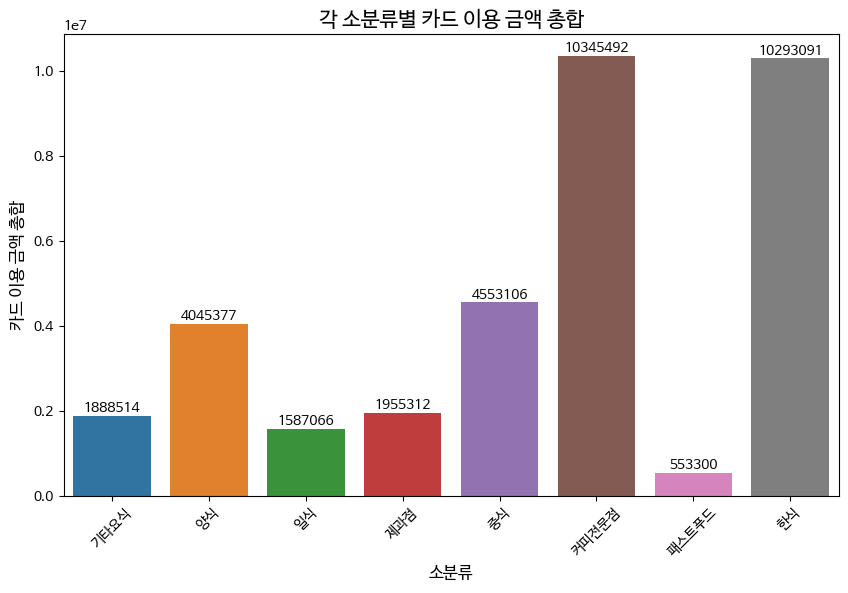

In [ ]:
# 각 소분류별 카드 이용 금액 총합 계산
sum_by_category = df.groupby('소분류')['카드이용금액계(AMT_CORR)'].sum().reset_index()

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='소분류', y='카드이용금액계(AMT_CORR)', data=sum_by_category)
plt.title('각 소분류별 카드 이용 금액 총합', fontsize=15)
plt.xlabel('소분류', fontsize=12)
plt.ylabel('카드 이용 금액 총합', fontsize=12)

for index, row in sum_by_category.iterrows():
    plt.text(index, row['카드이용금액계(AMT_CORR)'], str(row['카드이용금액계(AMT_CORR)']), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

- 커피전문점과 한식에 대한 소비가 가장 높다.
- 커피전문점은 식사류는아니므로 식사류만 비교해본다면, 한식-중식-양식 순으로소비금액이 높다.

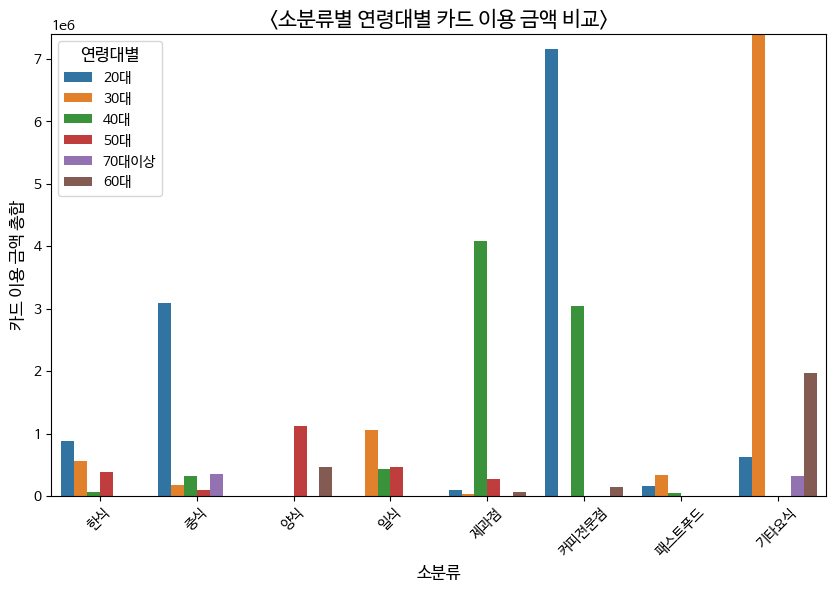

In [ ]:
# 각 소분류와 연령대별로 카드 이용 금액 총합 계산
sum_by_category_age = df.groupby(['소분류', '연령대별(AGE)'])['카드이용금액계(AMT_CORR)'].sum().reset_index()

#category_order 생성
category_order = ['한식','중식','양식','일식','제과점','커피전문점','패스트푸드','기타요식']

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='소분류', y='카드이용금액계(AMT_CORR)', hue='연령대별(AGE)', data=sum_by_category_age)
plt.title('<소분류별 연령대별 카드 이용 금액 비교>', fontsize=15)
plt.xlabel('소분류', fontsize=12)
plt.ylabel('카드 이용 금액 총합', fontsize=12)
plt.xticks(range(len(category_order)), category_order, rotation=45)

plt.legend(title='연령대별', title_fontsize=12)
plt.show()

- 20,30대가 주로 커피전문점을 이용한다.
- '기타요식'은 앞선 카테고리를 제외한 모든 업종을 포함하고 있기에 제외한다.
- 커피전문점이나 제과점 등 간단한 디저트류에 많이소비하는 것을 알 수 있다.
- 특히, 40대는 가장 소비금액이 높은 분류인 '커피전문점'과 '제과점' 두곳에서 모두 소비를 많이 하는 부류에 속해있다.
- 식사보다 디저트류는 필수로 자리잡고 있다고 유추할 수 있다. 즉, 식사는 거르더라도 디저트는 자주 찾는 경향이 있어보인다.
- 중식, 한식..